# NLP SENTIMENT ANALYSIS PROJECT - GROUP 4

# 1. Business Understanding

## 1.1 Business Overview
Social media platforms have become key spaces for consumers to express opinions about products, brands, and services. Companies like Apple and Google are frequently mentioned in posts, where users share thoughts on their products and updates, generating valuable data on public perception.

However, extracting insights from this massive volume of unstructured data is a challenge. Traditional sentiment analysis methods struggle with the nuances of slang, sarcasm, and ambiguous language, making it difficult for companies to understand true sentiment.

A potential solution is building a Natural Language Processing (NLP) model to automatically classify the sentiment of posts related to Apple and Google products. This would allow businesses to assess sentiment in real-time and improve decision-making.

By leveraging NLP, Apple and Google could gain actionable insights into customer sentiment, leading to better product development and more effective marketing strategies.

## 1.2 Problem Statement
Consumers frequently share their opinions about Apple and Google products on social media, creating a vast pool of unstructured data. However, analyzing these opinions manually is time-consuming and impractical due to the sheer volume of posts. Sentiment analysis on this data is challenging because social media posts often contain slang, sarcasm, and ambiguous language, making it difficult to accurately determine public sentiment. Without an automated system, companies like Apple and Google struggle to efficiently gauge consumer sentiment and make informed decisions based on real-time public opinion.

## 1.3 Objectives
### Main Objective
To develop a Natural Language Processing (NLP) model that can accurately classify the sentiment of social media posts related to Apple and Google products into categories such as positive, negative, and neutral, providing businesses with actionable insights to guide marketing strategies, product development, and customer engagement.

### Specific Objectives
1. To examine the distribution of sentiment labels and individual variables in the dataset:

- Understand the proportions of sentiment categories, identify key features in the text data, and ensure the dataset is balanced and ready for modeling.

2. To identify relationships between variables in the dataset:

- Explore how text features, such as word usage or length, relate to sentiment labels and uncover patterns that inform model design.

3. To build and evaluate baseline sentiment classification models:

- Develop both binary and multiclass classifiers using Logistic Regression to establish a performance baseline for sentiment analysis.

4. To enhance sentiment classification models with advanced techniques:

- Improve the performance of both binary and multiclass classifiers by implementing Support Vector Machines (SVM), Randomforest Classifier, Xgboost Classifier, and BERT Transformer.

## 1.4 Success Criteria
- Accuracy: The overall percentage of correctly classified Tweets (target: 80%).
- Precision: The proportion of true positive sentiment predictions for each class (positive, negative, neutral) (target: 75% for each class).
- Recall: The proportion of actual sentiments correctly predicted (target: 75% for each class).
- F1 Score: A balanced measure of precision and recall (target: 75% for each class).
- Confusion Matrix: Minimize misclassifications across sentiment classes.

# 2. Data Understanding

The dataset comes from CrowdFlower via [data.world](https://data.world/crowdflower/brands-and-product-emotions/workspace/file?filename=judge-1377884607_tweet_product_company.csv).The dataset consists of over 9,000 Tweets about Apple and Google products. Key columns include tweet_text, the content of the Tweet, emotion_in_tweet_is_directed_at, which identifies the targeted product or brand, and is_there_an_emotion_directed_at_a_brand_or_product, indicating the sentiment toward the brand.

In [1]:
# Importing the necessary classes
from Classes import DataUnderstanding, DataCleaner, TextPreprocessor, EDA, Encoder
import pandas as pd

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [2]:
# Load the data
df = pd.read_csv('judge-1377884607_tweet_product_company.csv',encoding='latin1')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
# Creating an instance for data_understanding
data_understanding = DataUnderstanding(df)

We begin by previewing the basic details about our data

In [4]:
# General information of the dataframe
data_understanding.basic_info()


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB
None


The DataFrame contains 3 columns whose datatypes are all objects. While the tweet_text and is_there_an_emotion_directed_at_a_brand_or_product columns have no missing values, the emotion_in_tweet_is_directed_at column has 3,291 non-null entries, indicating a significant portion of missing data.

In [5]:
# check the shape of the dataframe
data_understanding.basic_shape()


Basic Shape:
(9093, 3)


This dataset contains 9093 entries and 3 columns. Each entry represents recorded sentiments from users.

In [6]:
# Check statistical summary of the dataframe
data_understanding.statistical_summary()


Statistical Summary:
                                               tweet_text  \
count                                                9092   
unique                                               9065   
top     RT @mention Marissa Mayer: Google Will Connect...   
freq                                                    5   

       emotion_in_tweet_is_directed_at  \
count                             3291   
unique                               9   
top                               iPad   
freq                               946   

       is_there_an_emotion_directed_at_a_brand_or_product  
count                                                9093  
unique                                                  4  
top                    No emotion toward brand or product  
freq                                                 5389  


The DataFrame contains mostly unique tweet_text entries, with the most frequent being retweeted 5 times, while the emotion_in_tweet_is_directed_at column is dominated by "iPad" (946 occurrences), and the majority of tweets (5,389) indicate "No emotion toward brand or product.

# 3. Data Preparation

## 3.1 Data Cleaning

### 3.1.1 Shorten Column names

In [7]:
# Initialize the DataCleaner class
cleaner = DataCleaner(df)

First off, started with shortening the column names to easier reference

In [8]:
# Shorten column names('tweet', 'brand_product', 'emotion')
cleaner.shorten_column_names()
print("\nAfter shortening column names:")
print(df.columns)


After shortening column names:
Index(['tweet', 'brand_product', 'emotion'], dtype='object')


### 3.1.2. Handling Missing Values

In [9]:
# Instantiating the Cleaner class
cleaner = DataCleaner(df)

In [10]:
# Check for missing values
cleaner.check_missing_values()

,0
tweet,1
brand_product,5802
emotion,0


Since the 'brand_product' column is crucial for the analysis and cannot be dropped, we will fill its missing values with relevant categories based on the content of the 'tweet' column.

In [11]:
# Checking value counts for brand_product column
print("Value counts for 'brand_product':")
categories = df['brand_product'].unique().tolist()
categories

Value counts for 'brand_product':


['iPhone',
 'iPad or iPhone App',
 'iPad',
 'Google',
 nan,
 'Android',
 'Apple',
 'Android App',
 'Other Google product or service',
 'Other Apple product or service']

We will deal with the missing values in the 'brand_product' column by filling in the `brand_product` column if any of the above categories is mentioned in the `tweet` string.

In [12]:
#1. Check for missing values before filling
print("Missing values before filling:")
print(cleaner.check_missing_values())

#2. Fill missing 'brand_product' values
cleaner.handle_missing_brand_product(categories)

#3. Check for missing values after filling
print("Missing values after filling:")
print(cleaner.check_missing_values())

Missing values before filling:
tweet               1
brand_product    5802
emotion             0
dtype: int64
Missing values after filling:
tweet              1
brand_product    760
emotion            0
dtype: int64


The number of missing values in the 'brand_product' column has significantly decreased. From the raw CSV file, some tweets were just random and didn't have any association with the brand ,therefore to further clean the data, we will now drop the remaining missing values, including the one  in the 'tweet' column.

In [13]:
# Drop rows with missing values for brand_product and emotion columns
df = df.dropna()
print("\nAfter dropping rows with missing values:")
print(df.isnull().sum())


After dropping rows with missing values:
tweet            0
brand_product    0
emotion          0
dtype: int64


We also observe that there are missing values with a placeholder: `nan` in the `brand_product` column that we will also drop.

In [14]:
placeholder = df[df['brand_product'] == 'nan'].index
#checking the placeholders before
print(f"Number of placeholders before: {len(placeholder)}")

#dropping the rows with the placeholders
df = df.drop(placeholder)

#checking the placeholders after dropping
print(f"Number of placeholders after: {len(df[df['brand_product'] == 'nan'])}")

Number of placeholders before: 13
Number of placeholders after: 0


Now our dataset has no missing values

### 3.1.3. Handling Duplicates

In [15]:
#  Checking for duplicates
duplicates = cleaner.check_duplicates()
print(f"\nNumber of duplicate rows: {duplicates}")

#  Dropping duplicate rows
df = df.drop_duplicates()
print("\nAfter dropping duplicate rows:")
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


Number of duplicate rows: 22

After dropping duplicate rows:

Number of duplicate rows: 0


### 3.1.4. Merging and Sorting Columns

Since the `brand_product` column comprises of products under either Apple or Google as a brand, merging all Apple products and Google products respectively is a necessary step to determine the customer base reactions towards the brands. We will do this by creating a `brand_category` column

In [16]:
# Map brand to category
brand_mapping = {
    'google': 'Google',
    'ipad': 'Apple',
    'iPad': 'Apple',
    'iphone': 'Apple',
    'apple': 'Apple',
    'Apple': 'Apple',
    'iPad or iPhone App': 'Apple',
    'Google': 'Google',
    'iPhone': 'Apple',
    'Other Google product or service': 'Google',
    'android': 'Google',
    'Android App': 'Google',
    'Android': 'Google',
    'Other Apple product or service': 'Apple',
    'android app': 'Google'
    }
df['brand_category'] = df['brand_product'].map(brand_mapping)

In [17]:
# Displaying the updated DataFrame after mapping
print("\nUpdated DataFrame:")
df.head()


Updated DataFrame:


,tweet,brand_product,emotion,brand_category
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,Apple
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,Apple
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,Apple
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,Apple
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,Google


Sorting the `emotion` column by categorizing emotions that are neither positive nor negative as neutral.

In [18]:
# Mapping 'emotion' column
emotion_mapping = {
    'Positive emotion': 'Positive',
    'Negative emotion': 'Negative',
    'No emotion toward brand or product': 'Neutral',
    "I can't tell": 'Neutral'
}
df['emotion'] = df['emotion'].map(emotion_mapping)

# check the result value_counts
df['emotion'].value_counts()

,count
emotion,
Neutral,4775
Positive,2957
Negative,568


In [19]:
#let's save the cleaned_df
df_after_cleaning = df.copy()

## 3.2 Text Preprocessing

In [20]:
# Initialize the TextPreprocessor class
preprocessor = TextPreprocessor(df)

### 3.2.1 Text Cleaning
Clean the tweet text by removing unwanted characters such as URLs, mentions, hashtags, and special characters.

In [21]:
# Cleaninf the tweet text
df['cleaned_tweet_text'] = df['tweet'].apply(preprocessor.clean_text)
df[['tweet', 'cleaned_tweet_text']].head()

,tweet,cleaned_tweet_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,I have a 3G iPhone After 3 hrs tweeting at it ...
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Know about Awesome iPadiPhone app that youll l...
2,@swonderlin Can not wait for #iPad 2 also. The...,Can not wait for 2 also They should sale them ...
3,@sxsw I hope this year's festival isn't as cra...,I hope this years festival isnt as crashy as t...
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,great stuff on Fri Marissa Mayer Google Tim OR...


### 3.2.2 Text Tokenization
Tokenize the cleaned tweet text. This step breaks the text into individual words or tokens.

In [22]:
# Tokenizing the cleaned texts
from nltk.tokenize import word_tokenize
df['tokens'] = df['cleaned_tweet_text'].apply(lambda x: word_tokenize(x))
df[['cleaned_tweet_text', 'tokens']].head()

,cleaned_tweet_text,tokens
0,I have a 3G iPhone After 3 hrs tweeting at it ...,"[I, have, a, 3G, iPhone, After, 3, hrs, tweeti..."
1,Know about Awesome iPadiPhone app that youll l...,"[Know, about, Awesome, iPadiPhone, app, that, ..."
2,Can not wait for 2 also They should sale them ...,"[Can, not, wait, for, 2, also, They, should, s..."
3,I hope this years festival isnt as crashy as t...,"[I, hope, this, years, festival, isnt, as, cra..."
4,great stuff on Fri Marissa Mayer Google Tim OR...,"[great, stuff, on, Fri, Marissa, Mayer, Google..."


### 3.2.3 Lowercasing
Convert all tokens to lowercase to standardize the text.

In [23]:
# lowercasing the tokenized text
preprocessor.df['tokens_lowercased'] = preprocessor.df['tokens'].apply(preprocessor.to_lowercase)
df[['tokens', 'tokens_lowercased']].head()

,tokens,tokens_lowercased
0,"[I, have, a, 3G, iPhone, After, 3, hrs, tweeti...","[i, have, a, 3g, iphone, after, 3, hrs, tweeti..."
1,"[Know, about, Awesome, iPadiPhone, app, that, ...","[know, about, awesome, ipadiphone, app, that, ..."
2,"[Can, not, wait, for, 2, also, They, should, s...","[can, not, wait, for, 2, also, they, should, s..."
3,"[I, hope, this, years, festival, isnt, as, cra...","[i, hope, this, years, festival, isnt, as, cra..."
4,"[great, stuff, on, Fri, Marissa, Mayer, Google...","[great, stuff, on, fri, marissa, mayer, google..."


### 3.2.4 Remove Stop Words¶
Remove common stop words (e.g., "the", "is", "and") that do not contribute meaningful information for sentiment analysis.

In [24]:
# Removing stop words
df['tokens_stopwords_removed'] = df['tokens_lowercased'].apply(preprocessor.remove_stopwords_and_short_words)
df[['tokens_lowercased', 'tokens_stopwords_removed']].head()

,tokens_lowercased,tokens_stopwords_removed
0,"[i, have, a, 3g, iphone, after, 3, hrs, tweeti...","[iphone, hrs, tweeting, dead, need, upgrade, p..."
1,"[know, about, awesome, ipadiphone, app, that, ...","[know, awesome, ipadiphone, app, youll, likely..."
2,"[can, not, wait, for, 2, also, they, should, s...","[wait, also, sale]"
3,"[i, hope, this, years, festival, isnt, as, cra...","[hope, years, festival, isnt, crashy, years, i..."
4,"[great, stuff, on, fri, marissa, mayer, google...","[great, stuff, fri, marissa, mayer, google, ti..."


### 3.2.5 Lemmatization
Lemmatize the tokens to reduce words to their base or root form, which helps with reducing variations of the same word.

In [25]:
# lemmatizing the tokens_stopwords_removed
df['lemmatized_text'] = df['tokens_stopwords_removed'].apply(preprocessor.lemmatize_with_pos)
df[['tokens_stopwords_removed', 'lemmatized_text']].head()

,tokens_stopwords_removed,lemmatized_text
0,"[iphone, hrs, tweeting, dead, need, upgrade, p...","[iphone, hr, tweet, dead, need, upgrade, plugi..."
1,"[know, awesome, ipadiphone, app, youll, likely...","[know, awesome, ipadiphone, app, youll, likely..."
2,"[wait, also, sale]","[wait, also, sale]"
3,"[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph..."
4,"[great, stuff, fri, marissa, mayer, google, ti...","[great, stuff, fri, marissa, mayer, google, ti..."


### 3.2.6 Vectorization
Convert the cleaned text into numerical features using TF-IDF (Term Frequency-Inverse Document Frequency) for machine learning models.

In [26]:
# Apply vectorization
X_df = preprocessor.vectorize(df['lemmatized_text'])
X_df.head()

,0310apple,100,103011p,1045am3,10am,10k,10mins,10pm,10x,10x2,...,zip,zite,zms,zombie,zomg,zone,zoom,zuckerberg,zynga,zzzs
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Available columns
print(preprocessor.df.columns)

Index(['tweet', 'brand_product', 'emotion', 'brand_category',
       'cleaned_tweet_text', 'tokens', 'tokens_lowercased',
       'tokens_stopwords_removed', 'lemmatized_text'],
      dtype='object')


In [28]:
# Display the updated DataFrame after text processing
print("\nUpdated DataFrame:")
preprocessor.get_processed_data().head()


Updated DataFrame:


,tweet,brand_product,emotion,brand_category,cleaned_tweet_text,tokens,tokens_lowercased,tokens_stopwords_removed,lemmatized_text
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative,Apple,I have a 3G iPhone After 3 hrs tweeting at it ...,"[I, have, a, 3G, iPhone, After, 3, hrs, tweeti...","[i, have, a, 3g, iphone, after, 3, hrs, tweeti...","[iphone, hrs, tweeting, dead, need, upgrade, p...","[iphone, hr, tweet, dead, need, upgrade, plugi..."
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive,Apple,Know about Awesome iPadiPhone app that youll l...,"[Know, about, Awesome, iPadiPhone, app, that, ...","[know, about, awesome, ipadiphone, app, that, ...","[know, awesome, ipadiphone, app, youll, likely...","[know, awesome, ipadiphone, app, youll, likely..."
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive,Apple,Can not wait for 2 also They should sale them ...,"[Can, not, wait, for, 2, also, They, should, s...","[can, not, wait, for, 2, also, they, should, s...","[wait, also, sale]","[wait, also, sale]"
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative,Apple,I hope this years festival isnt as crashy as t...,"[I, hope, this, years, festival, isnt, as, cra...","[i, hope, this, years, festival, isnt, as, cra...","[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph..."
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive,Google,great stuff on Fri Marissa Mayer Google Tim OR...,"[great, stuff, on, Fri, Marissa, Mayer, Google...","[great, stuff, on, fri, marissa, mayer, google...","[great, stuff, fri, marissa, mayer, google, ti...","[great, stuff, fri, marissa, mayer, google, ti..."


##  4. Exploratorive Data Analysis

In [29]:
# Initialize the EDA class
eda = EDA(df)

### 4.1 Univariate Analysis

This involves us taking a look at the distribution of our feature and target columns. We use countplots, histograms, barplots and a wordcloud plot to analyse the distributions

#### 4.1.1 Distribution of Sentiment (Emotion)

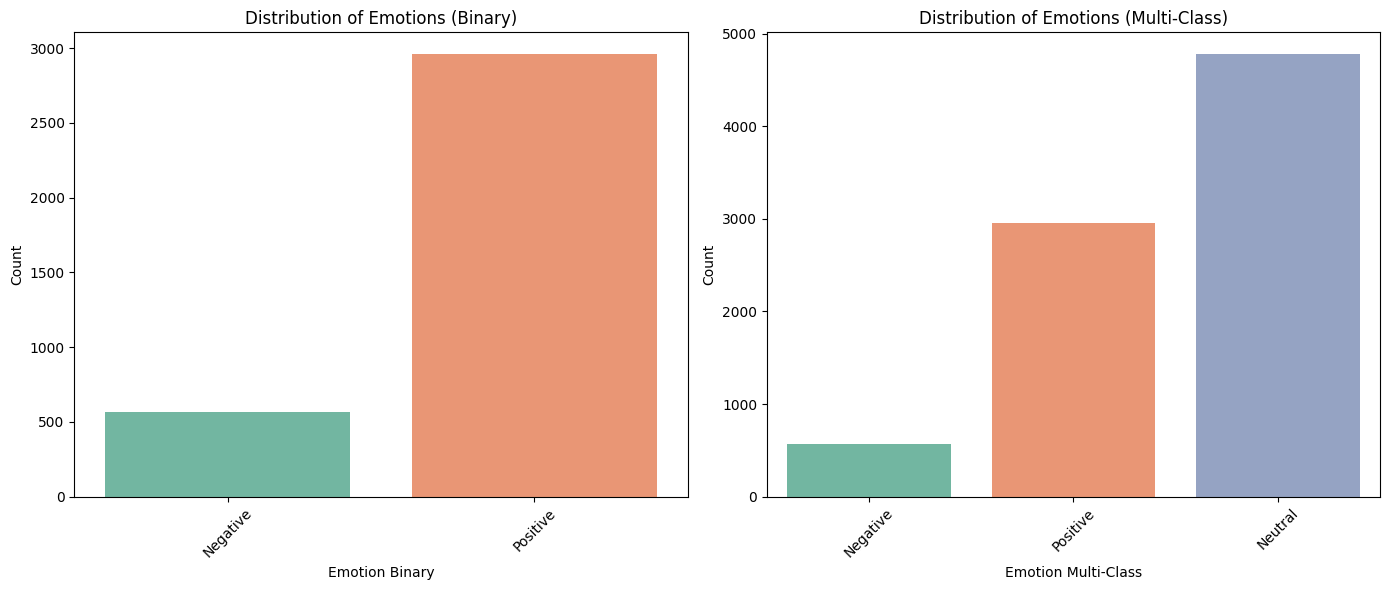

In [30]:
#plotting counplots for our emotion column
eda.plot_emotion_distribution()

We observe that the count of tweets with neutral emotion is high number compared to the positive and the negative ones which are the lowest.

#### 4.1.2 Frequency of Brand_Product Mentions

Countplots showing the distribution of tweets in the `brand_product` and `brand_category` columns.

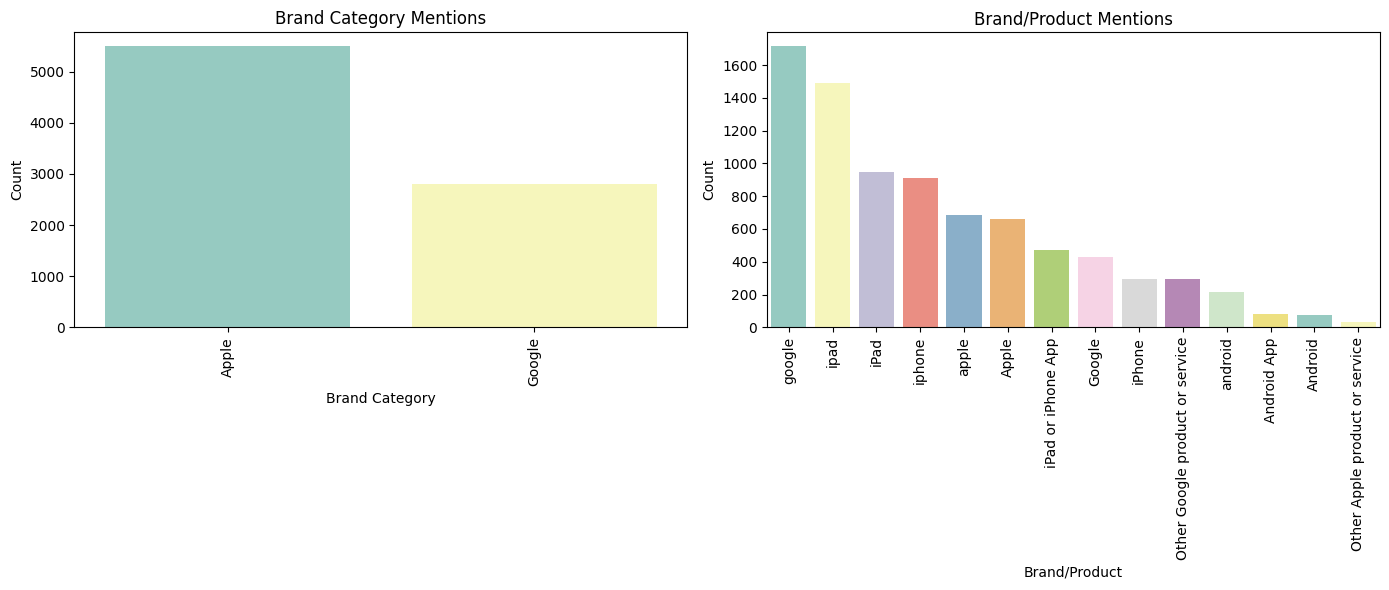

In [31]:
#visualizing countplots
eda.plot_brand_distribution()

We see that a high number of tweets are associated the `Apple` and related products(in the right plot) in the `brand_category` and `brand_product` column respectively.

#### 4.1.3. Length of Tweets (Word Count)

A histogram visualizing the distribution of the length of `tweets`

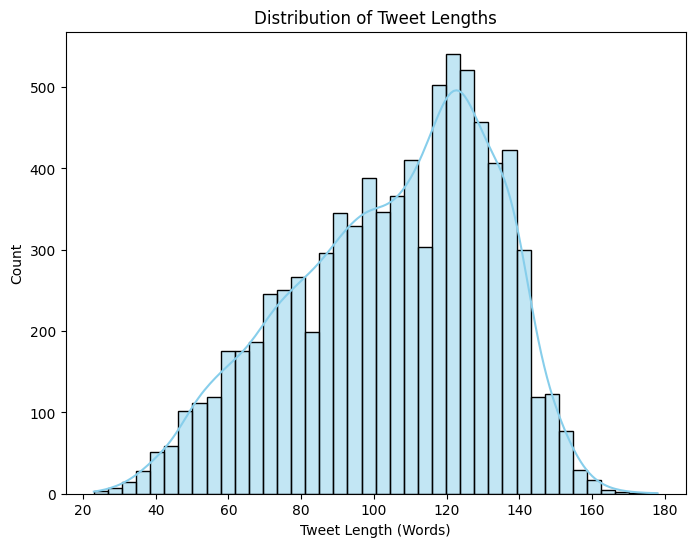

In [32]:
#visualizing the histoplot
eda.plot_tweet_length_distribution()

We notice that a high number of tweets are between the length of 120 to 130 words.

#### 4.1.4. Most Frequent Words in Tweets

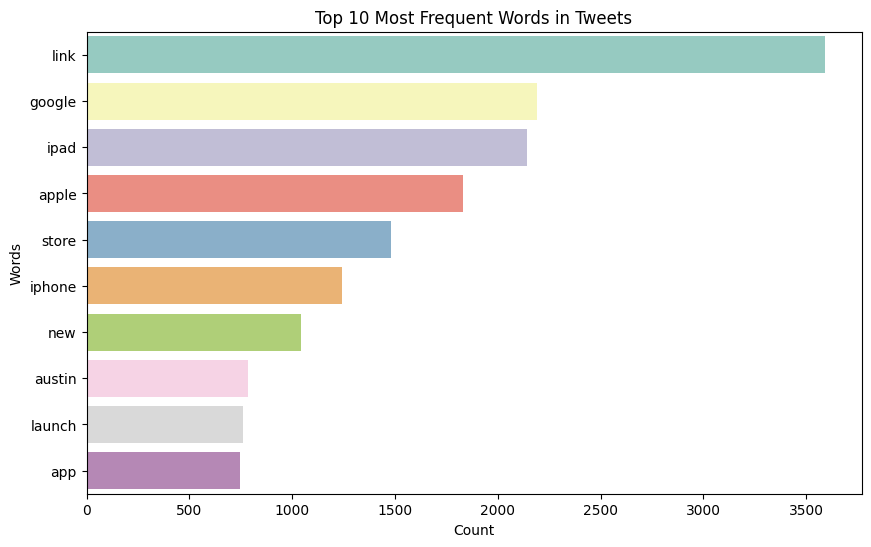

In [33]:
#visualizing a countplot of the most frequently used words
eda.plot_top_words()

The top 5 most frequently used words in tweets are; link, google, ipad, apple & store

## 4.2. Bivariate Analysis
We use countplots, boxplots among others to visualize the relations between two variables.

### 4.2.1. Sentiment vs. Brand Mention
Below, we visualize the mention of the brand category and the emotion

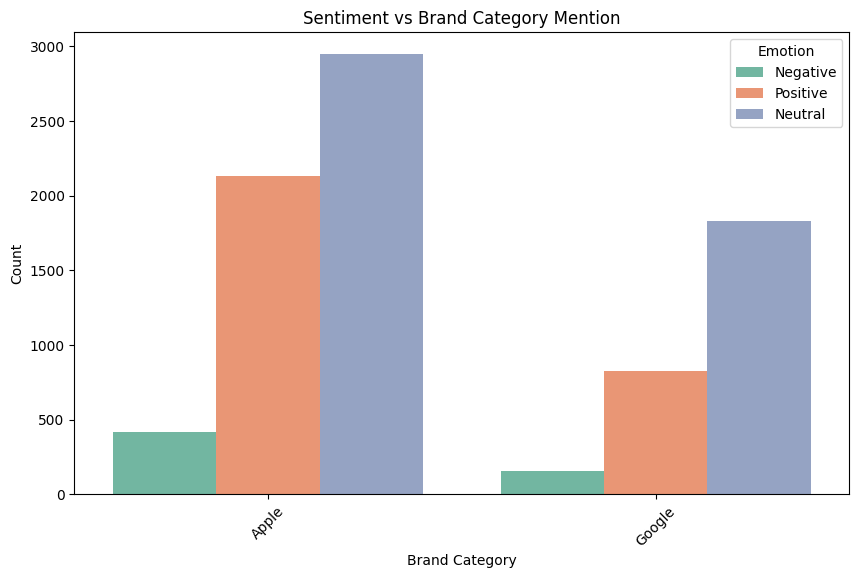

In [34]:
#plotting a countplot
eda.plot_sentiment_vs_brand()

We observe that the distribution of the emotions looks similar for both `brand_categories` with the most posts having `Neutral` sentiments followed by `Positive` and then `Negative` sentiments having the least count.

### 4.2.2. Sentiment vs. Tweet Length
We visualize a box plot showing the relation between how long a tweet is and whether this differes with the different emotions

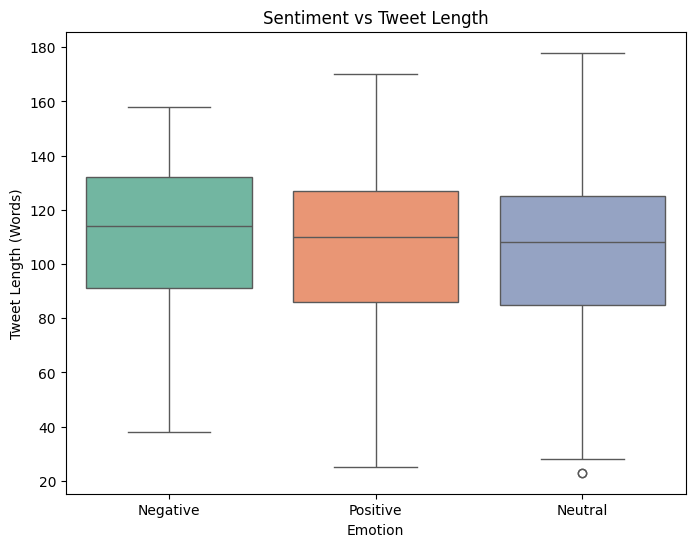

In [35]:
#plotting a boxplot
eda.plot_tweet_length_by_sentiment()

We observe that the `tweets` length is relatively within the same range for each `emotion` category.

#### 4.2.3. Sentiment vs. Specific Brands
We visualize a wordcloud plot showing the most frequent `brand_products` mentioned for each sentiment/emotion.

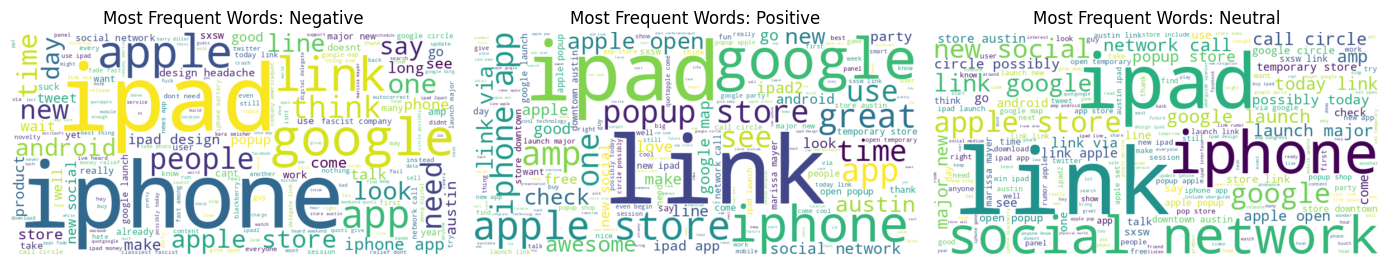

In [36]:
eda.plot_wordclouds_by_emotion()

We notice that the words 'iphone' and 'ipad' are the most common for the negative sentiment, while 'ipad' and 'link' are the most frequent in the positive sentiment tweets and 'link' and 'ipad' are most frequent in neutral tweets. These seems like there is no direct corelation with the words mentioned and the sentiment of the tweet since the same frequent word is seen in more that one sentiment category.

#### 4.2.4. Sentiment vs brand vs frequency of words

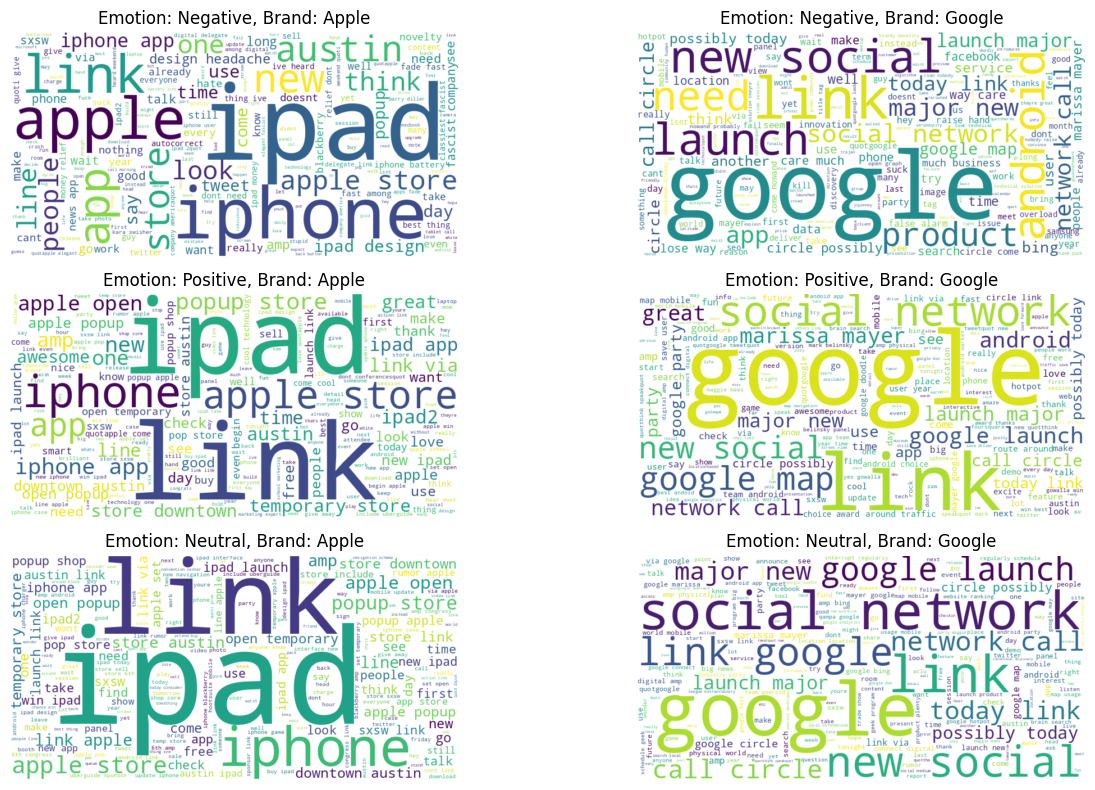

In [37]:
# Plotting wordclouds
eda.plot_wordclouds_by_emotion_and_brand()

Here we still observe that the most frequent words are almost equally common and appear in most sentiment categories. However as expected apple products are mostly mentioned in the `Apple` category and google & products are mentioned in the `Google` category.

### 4.3. Multi-variate Analysis

#### 4.3.1. Sentiment Analysis by Brand/Product and Tweet Length

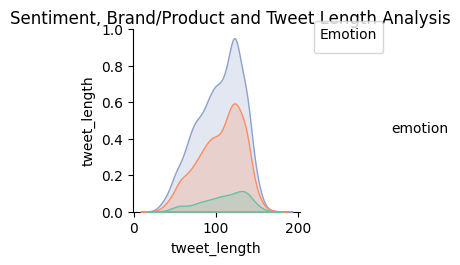

In [38]:
# Visualizing sentiments vs brand vs tweet length
eda.plot_pairplot_sentiment_analysis()

#### 4.3.2. NLP Features (TF-IDF or Word Embeddings) and Sentiment

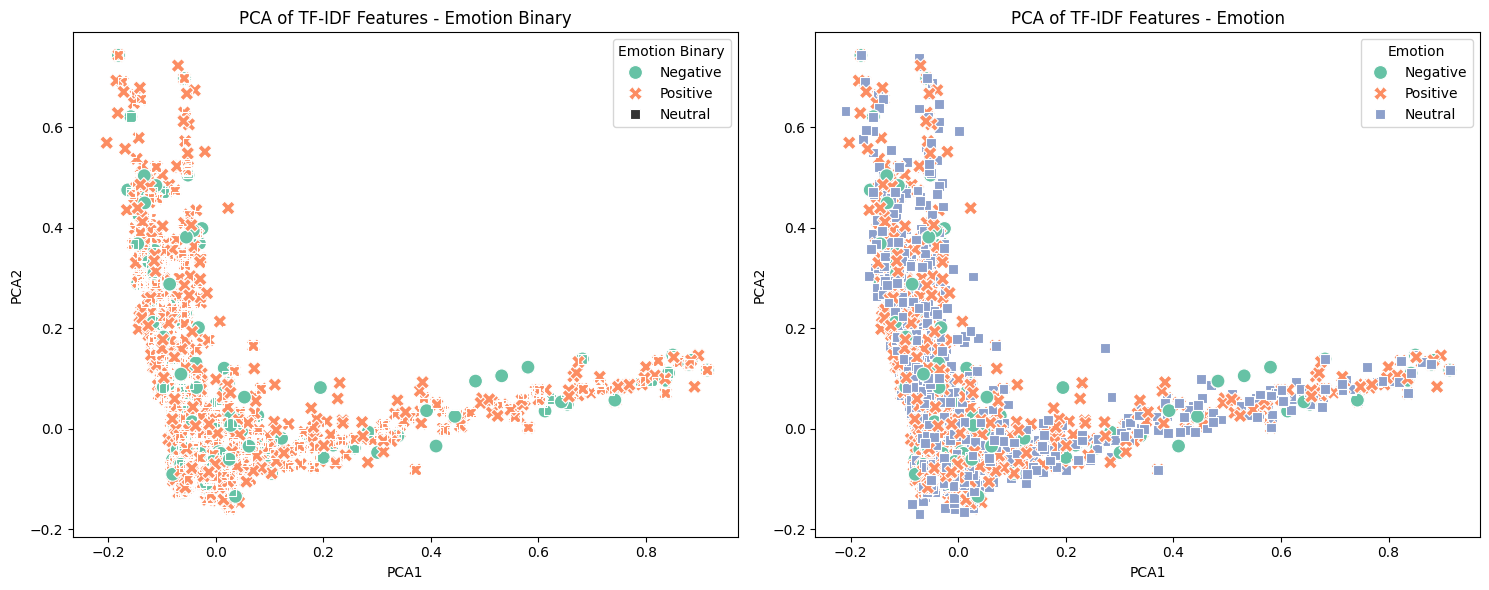

In [39]:
# plotting 2 components of pca
eda.plot_pca_analysis(X_df)

The left plot shows a clear separation between Negative and Positive emotions in a binary classification, with some overlap in the middle. The right plot introduces a Neutral category, adding complexity and increasing overlap between classes, especially in the middle region. While PCA effectively reduces dimensionality, the inclusion of the Neutral class makes class boundaries less defined, highlighting the challenge of distinguishing between closely related emotions. The binary classification achieves better separation due to reduced labeling complexity

## 5. Encoding the Categorical Columns

In [40]:
#Initialize the Encoder class
encoded = Encoder(df)

### 5.1. Encoding the `emotion` column
We will assign the `Negative` emotion to `0` , `Positive` to `1` and `Neutral` to `2`. This will allow us to have this as a binary column when we create a subset of the data with only the positive and negative sentiments.

In [41]:
#encoding the emotion column
emotion_map = {'Negative': 0, 'Positive': 1, 'Neutral': 2}
encoded.encode('emotion', emotion_map)

,tweet,brand_product,emotion,brand_category,cleaned_tweet_text,tokens,tokens_lowercased,tokens_stopwords_removed,lemmatized_text,tweet_length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,Apple,I have a 3G iPhone After 3 hrs tweeting at it ...,"[I, have, a, 3G, iPhone, After, 3, hrs, tweeti...","[i, have, a, 3g, iphone, after, 3, hrs, tweeti...","[iphone, hrs, tweeting, dead, need, upgrade, p...","[iphone, hr, tweet, dead, need, upgrade, plugi...",127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1,Apple,Know about Awesome iPadiPhone app that youll l...,"[Know, about, Awesome, iPadiPhone, app, that, ...","[know, about, awesome, ipadiphone, app, that, ...","[know, awesome, ipadiphone, app, youll, likely...","[know, awesome, ipadiphone, app, youll, likely...",139
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1,Apple,Can not wait for 2 also They should sale them ...,"[Can, not, wait, for, 2, also, They, should, s...","[can, not, wait, for, 2, also, they, should, s...","[wait, also, sale]","[wait, also, sale]",79
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,Apple,I hope this years festival isnt as crashy as t...,"[I, hope, this, years, festival, isnt, as, cra...","[i, hope, this, years, festival, isnt, as, cra...","[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph...",82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1,Google,great stuff on Fri Marissa Mayer Google Tim OR...,"[great, stuff, on, Fri, Marissa, Mayer, Google...","[great, stuff, on, fri, marissa, mayer, google...","[great, stuff, fri, marissa, mayer, google, ti...","[great, stuff, fri, marissa, mayer, google, ti...",131
...,...,...,...,...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,1,Apple,Ipad everywhere link,"[Ipad, everywhere, link]","[ipad, everywhere, link]","[ipad, everywhere, link]","[ipad, everywhere, link]",29
9089,"Wave, buzz... RT @mention We interrupt your re...",google,2,Google,Wave buzz RT We interrupt your regularly sched...,"[Wave, buzz, RT, We, interrupt, your, regularl...","[wave, buzz, rt, we, interrupt, your, regularl...","[wave, buzz, interrupt, regularly, scheduled, ...","[wave, buzz, interrupt, regularly, schedule, g...",125
9090,"Google's Zeiger, a physician never reported po...",google,2,Google,Googles Zeiger a physician never reported pote...,"[Googles, Zeiger, a, physician, never, reporte...","[googles, zeiger, a, physician, never, reporte...","[googles, zeiger, physician, never, reported, ...","[google, zeiger, physician, never, report, pot...",145
9091,Some Verizon iPhone customers complained their...,iphone,2,Apple,Some Verizon iPhone customers complained their...,"[Some, Verizon, iPhone, customers, complained,...","[some, verizon, iphone, customers, complained,...","[verizon, iphone, customers, complained, time,...","[verizon, iphone, customer, complain, time, fe...",140


### 5.2 encoding the `brand_category` column
Since our `brand_category` column only has two categories we automatically map it to be binary, with `Google` as `0` and `Apple` as `1`.

In [42]:
#encoding the brand_category column
brand_map = {'Apple': 1, 'Google': 0}
encoded.encode('brand_category', brand_map)

,tweet,brand_product,emotion,brand_category,cleaned_tweet_text,tokens,tokens_lowercased,tokens_stopwords_removed,lemmatized_text,tweet_length
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,0,1,I have a 3G iPhone After 3 hrs tweeting at it ...,"[I, have, a, 3G, iPhone, After, 3, hrs, tweeti...","[i, have, a, 3g, iphone, after, 3, hrs, tweeti...","[iphone, hrs, tweeting, dead, need, upgrade, p...","[iphone, hr, tweet, dead, need, upgrade, plugi...",127
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,1,1,Know about Awesome iPadiPhone app that youll l...,"[Know, about, Awesome, iPadiPhone, app, that, ...","[know, about, awesome, ipadiphone, app, that, ...","[know, awesome, ipadiphone, app, youll, likely...","[know, awesome, ipadiphone, app, youll, likely...",139
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,1,1,Can not wait for 2 also They should sale them ...,"[Can, not, wait, for, 2, also, They, should, s...","[can, not, wait, for, 2, also, they, should, s...","[wait, also, sale]","[wait, also, sale]",79
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,0,1,I hope this years festival isnt as crashy as t...,"[I, hope, this, years, festival, isnt, as, cra...","[i, hope, this, years, festival, isnt, as, cra...","[hope, years, festival, isnt, crashy, years, i...","[hope, year, festival, isnt, crashy, year, iph...",82
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,1,0,great stuff on Fri Marissa Mayer Google Tim OR...,"[great, stuff, on, Fri, Marissa, Mayer, Google...","[great, stuff, on, fri, marissa, mayer, google...","[great, stuff, fri, marissa, mayer, google, ti...","[great, stuff, fri, marissa, mayer, google, ti...",131
...,...,...,...,...,...,...,...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,1,1,Ipad everywhere link,"[Ipad, everywhere, link]","[ipad, everywhere, link]","[ipad, everywhere, link]","[ipad, everywhere, link]",29
9089,"Wave, buzz... RT @mention We interrupt your re...",google,2,0,Wave buzz RT We interrupt your regularly sched...,"[Wave, buzz, RT, We, interrupt, your, regularl...","[wave, buzz, rt, we, interrupt, your, regularl...","[wave, buzz, interrupt, regularly, scheduled, ...","[wave, buzz, interrupt, regularly, schedule, g...",125
9090,"Google's Zeiger, a physician never reported po...",google,2,0,Googles Zeiger a physician never reported pote...,"[Googles, Zeiger, a, physician, never, reporte...","[googles, zeiger, a, physician, never, reporte...","[googles, zeiger, physician, never, reported, ...","[google, zeiger, physician, never, report, pot...",145
9091,Some Verizon iPhone customers complained their...,iphone,2,1,Some Verizon iPhone customers complained their...,"[Some, Verizon, iPhone, customers, complained,...","[some, verizon, iphone, customers, complained,...","[verizon, iphone, customers, complained, time,...","[verizon, iphone, customer, complain, time, fe...",140


We now create a data frame with our encoded columns only.

In [43]:
#creating an encoded df with the encoded column
encoded_df = df[['emotion', 'brand_category']]
encoded_df

,emotion,brand_category
0,0,1
1,1,1
2,1,1
3,0,1
4,1,0
...,...,...
9088,1,1
9089,2,0
9090,2,0
9091,2,1


Checking the shape of our preprocessed text dataframe, `X-df` before concatnating to ensure that both dataframes have the same number of rows

In [44]:
#Checking the shape of our preprocessed text dataframe before
X_df.shape

(8300, 7388)

### 5.2. Concatenating the processed dataframe
Combining `X_df` and `encoded_df` to create `final_df`, a clean and fully preprocessed dataset.

In [45]:
#reseting the df indices to avoid NaN values
X_df_reset = X_df.reset_index(drop=True)
encoded_df_reset = encoded_df.reset_index(drop=True)

#putting together the final df
final_df = pd.concat([X_df_reset, encoded_df_reset], axis=1)
final_df.head()

,0310apple,100,103011p,1045am3,10am,10k,10mins,10pm,10x,10x2,...,zms,zombie,zomg,zone,zoom,zuckerberg,zynga,zzzs,emotion,brand_category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0


In [46]:
#checking the final shape
final_df.shape

(8300, 7390)

Creating a binary dataframe where we filter out the tweets with only the `positive` and `negative` sentiments in the target, `emotion` column.

In [47]:
#creating a binary dataframe with only the `positive` and `negative` emotion
binary_df = final_df[final_df['emotion'].isin([0,1])]
binary_df.shape

(3525, 7390)

Now that we have our cleaned, preprocessed datasets we will save them in a csv file that we will use for modelling.

In [48]:
# Save df_binary to a CSV file
binary_df.to_csv('binary_df.csv', index=False)

# Save df_multi to a CSV file
final_df.to_csv('final_df.csv', index=False)

We then proceeded to use the clean, preprocessed data to train and test our models in the **Modeling Notebook** found in this repository.